In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Cleaning

In [2]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df_movies.dropna(subset=['votes', 'gross', 'runtime', 'rating',
                         'writer', 'country', 'company'], axis=0, inplace=True) # 3.3% of dataset were removed
df_movies.drop('released', axis=1, inplace=True)
df_movies = df_movies.astype({'votes': 'int64', 'gross': 'int64', 'runtime': 'int64'})
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7659
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   score     7412 non-null   float64
 5   votes     7412 non-null   int64  
 6   director  7412 non-null   object 
 7   writer    7412 non-null   object 
 8   star      7412 non-null   object 
 9   country   7412 non-null   object 
 10  budget    5421 non-null   float64
 11  gross     7412 non-null   int64  
 12  company   7412 non-null   object 
 13  runtime   7412 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 868.6+ KB


# Transformation

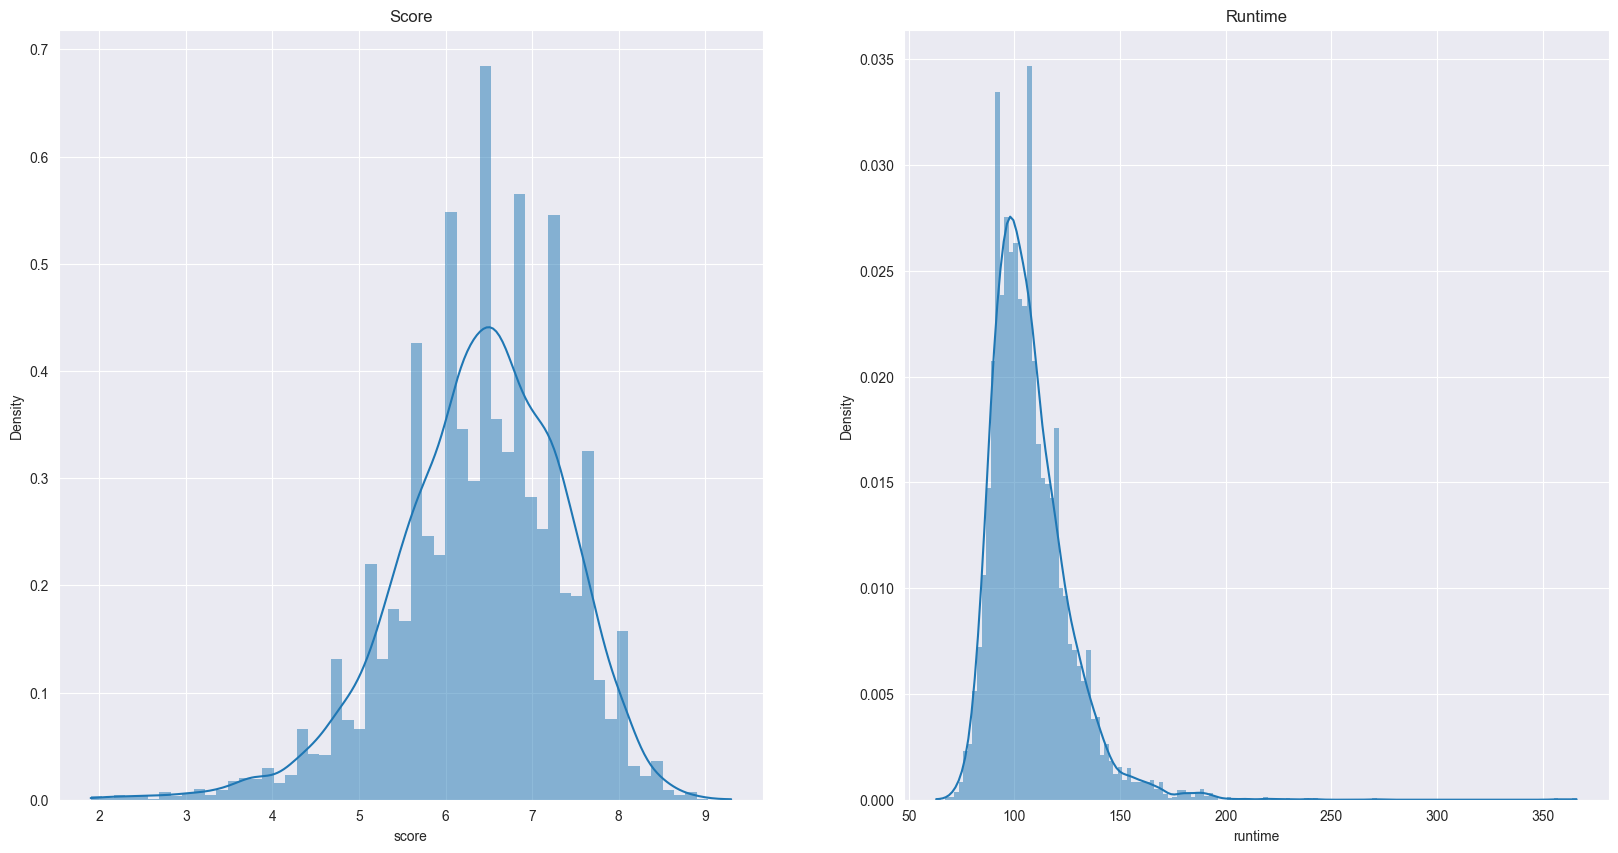

In [5]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(df_movies['score'], kde=True, linewidth=0, stat="density")
plt.title('Score')

plt.subplot(1, 2, 2)
sns.histplot(df_movies['runtime'], kde=True, linewidth=0, stat="density")
plt.title('Runtime')

plt.show()

In [6]:
df_movies['score'].fillna(df_movies['score'].mean(), inplace=True)
df_movies['runtime'].fillna(df_movies['runtime'].mean(), inplace=True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7659
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   score     7412 non-null   float64
 5   votes     7412 non-null   int64  
 6   director  7412 non-null   object 
 7   writer    7412 non-null   object 
 8   star      7412 non-null   object 
 9   country   7412 non-null   object 
 10  budget    5421 non-null   float64
 11  gross     7412 non-null   int64  
 12  company   7412 non-null   object 
 13  runtime   7412 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 868.6+ KB


In [7]:
df_movies['rating'].unique()

array(['R', 'PG', 'G', 'Not Rated', 'NC-17', 'Approved', 'PG-13',
       'Unrated', 'X', 'TV-PG', 'TV-MA', 'TV-14'], dtype=object)

USA film classification system:
G (General Audiences) – All ages admitted.
PG (Parental Guidance Suggested) – Some material may not be suitable for children.
PG-13 (Parents Strongly Cautioned) – Some material may be inappropriate for children under 13.
R (Restricted) – Under 17 requires accompanying parent or adult guardian.
NC-17 (Adults Only) – No one 17 and under admitted.

From IMBb:
'TV-MA' and 'X' is similar to 'NC-17'
'TV-14' corresponds to 'PG-13'
'TV-PG' corresponds to 'PG'
'Unrated' is the same as 'Not Rated'
'Approved' is similar to 'PG-13'

In [8]:
to_replace = {'TV-MA': 'NC-17',
              'X': 'NC-17',
              'TV-14': 'PG-13',
              'TV-PG': 'PG',
              'Not Rated': 'Unrated',
              'Approved': 'PG-13'}
df_movies['rating'] = df_movies['rating'].replace(to_replace = to_replace)
df_movies['rating'].unique()
# now we have MPA ratings

array(['R', 'PG', 'G', 'Unrated', 'NC-17', 'PG-13'], dtype=object)

Sort it by age restriction
1 - G
2 - PG
3 - PG-13
4 - R
5 - NC-17
6 - Unrated

<AxesSubplot:>

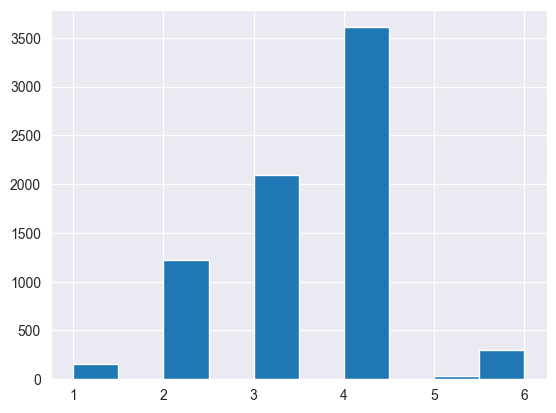

In [9]:
to_replace = {'G': 1,
              'PG': 2,
              'PG-13': 3,
              'R': 4,
              'NC-17': 5,
              'Unrated': 6}
df_movies['rating'] = df_movies['rating'].replace(to_replace = to_replace)
df_movies['rating'].hist()

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>],
       [<AxesSubplot:title={'center':'runtime'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

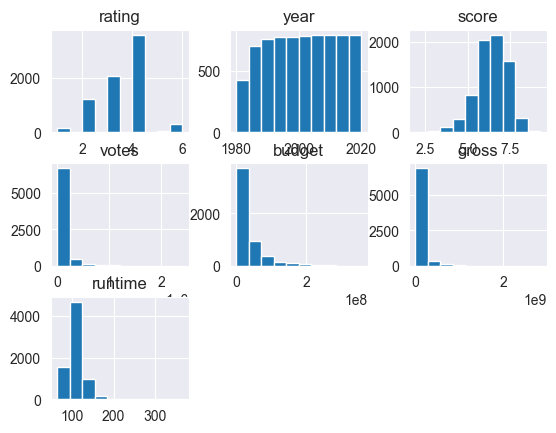

In [10]:
df_movies.hist()

array([[<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'runtime'}>]], dtype=object)

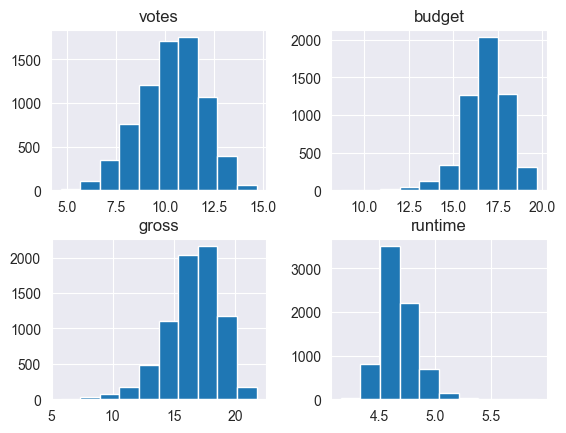

In [11]:
# some features are skewed
skewed_columns = ['votes', 'budget', 'gross', 'runtime']
for column in skewed_columns:
    df_movies[column] = np.log1p(df_movies[column])

df_movies[skewed_columns].hist()

# Model to fill in budget

In [12]:
num_features = df_movies.select_dtypes(include=np.number)
X, y = num_features.drop('budget', axis=1), num_features['budget']
X_pred = X[y.isna()]
y_pred = y[y.isna()]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[y.isna() == False], y.dropna(), test_size=0.2)

In [14]:
KNN = KNeighborsRegressor(algorithm='kd_tree', n_jobs=-1)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)
# I don't like that score :(

0.41596089619689414

In [15]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.507481414176398

In [16]:
gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train)
gradient.score(X_test, y_test)

0.6003461706821036

In [17]:
# check the mean absolute error
abs(y_test - gradient.predict(X_test)).sum() / y_test.size
# I think not bad at all

0.5725253790825388

In [18]:
df_movies.loc[y.isna(), 'budget'] = gradient.predict(X_pred)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7659
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   int64  
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   score     7412 non-null   float64
 5   votes     7412 non-null   float64
 6   director  7412 non-null   object 
 7   writer    7412 non-null   object 
 8   star      7412 non-null   object 
 9   country   7412 non-null   object 
 10  budget    7412 non-null   float64
 11  gross     7412 non-null   float64
 12  company   7412 non-null   object 
 13  runtime   7412 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 868.6+ KB


<AxesSubplot:>

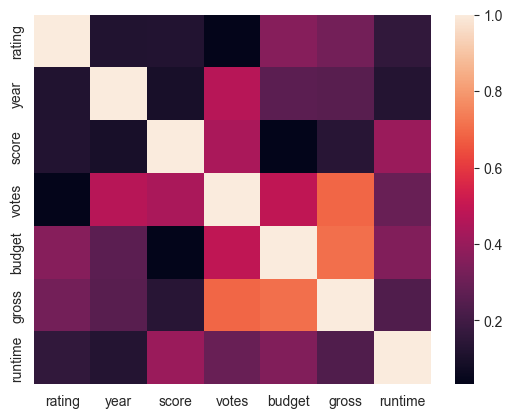

In [19]:
sns.heatmap(np.abs(df_movies.corr()))

In [20]:
np.abs(df_movies.corr())

,rating,year,score,votes,budget,gross,runtime
rating,1.000000,0.116161,0.122824,0.039724,0.359704,0.318815,0.159219
year,0.116161,1.000000,0.093951,0.468792,0.260553,0.251872,0.124293
score,0.122824,0.093951,1.000000,0.439317,0.032712,0.136958,0.404968
votes,0.039724,0.468792,0.439317,1.000000,0.487186,0.686971,0.292807
budget,0.359704,0.260553,0.032712,0.487186,1.000000,0.705462,0.348996
gross,0.318815,0.251872,0.136958,0.686971,0.705462,1.000000,0.236073
runtime,0.159219,0.124293,0.404968,0.292807,0.348996,0.236073,1.000000


# Recommendation system

In [21]:
df_num = df_movies.select_dtypes(include=np.number)
num_columns = df_num.columns
model = NearestNeighbors()
model.fit(df_num)

NearestNeighbors()

In [22]:
my_film = df_movies.loc[df_movies['name'].str.contains('Malena', case=False)]
my_film

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
3649,Malena,4,Comedy,2000,7.5,11.451061,Giuseppe Tornatore,Giuseppe Tornatore,Monica Bellucci,Italy,16.198179,16.489196,Medusa Film,4.691348


In [23]:
indices = model.kneighbors(my_film[num_columns], return_distance=False)[0]
df_movies.iloc[indices]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
3649,Malena,4,Comedy,2000,7.5,11.451061,Giuseppe Tornatore,Giuseppe Tornatore,Monica Bellucci,Italy,16.198179,16.489196,Medusa Film,4.691348
3715,Quills,4,Biography,2000,7.3,10.859018,Philip Kaufman,Doug Wright,Geoffrey Rush,United Kingdom,16.418200,16.705284,Fox Searchlight Pictures,4.828314
3979,The Experiment,4,Drama,2001,7.7,11.429555,Oliver Hirschbiegel,Mario Giordano,Moritz Bleibtreu,Germany,16.293516,16.438939,Typhoon,4.795791
3902,Frailty,4,Crime,2001,7.2,11.277216,Bill Paxton,Brent Hanley,Bill Paxton,United States,16.213406,16.673304,David Kirschner Productions,4.615121
3523,Ghost Dog: The Way of the Samurai,4,Action,1999,7.5,11.362114,Jim Jarmusch,Jim Jarmusch,Forest Whitaker,France,16.358643,16.054141,Pandora Filmproduktion,4.762174
